# <center>Anastasios Kotronis itp22104<br>DIT178 2022-2023<br>Presentation - Apache Kafka</center>

# Apache Kafka

**Event streaming** platform used to *collect*, *store* and *process* real time data streams at scale.

***Event streaming***: (&rarr; *Event*: Each data point originating from a system, *Stream*: Ongoing delivery of each data point) The practice of
- <u>**capturing**</u> data in real-time from event sources (like databases, sensors, mobile devices, cloud services, and software applications) in the form of streams of events
- <u>**storing**</u> these event streams durably for later retrieval
- <u>**manipulating**</u>, <u>**processing**</u>, and <u>**reacting**</u> to the event streams in real-time as well as retrospectively
- <u>**routing**</u> the event streams to different destination technologies as needed.

## Functionality provided
- **Publish** (write) and **subscribe** to (read) streams of events, including continuous import/export of your data from other systems.
- **Store** streams of events durably and reliably for as long as you want.
- **Process** streams of events as they occur or retrospectively.

## Advantages
- Distributed (Distributed system consisting of servers (brokers) and clients that communicate via a high-performance TCP network protocol)
- Highly Scalable (Concept of topic partitions, consumer groups)
- Elastic (Adapts and manages resources according to workload requirements)
- Fault Tolerant (If any of its servers fails, the other servers will take over their work. Data is replicated)

## Use cases
- To process payments and financial transactions in real-time, such as in stock exchanges, banks, and insurances.
- To track and monitor cars, trucks, fleets, and shipments in real-time, such as in logistics and the automotive industry.
- To continuously capture and analyze sensor data from IoT devices or other equipment, such as in factories and wind parks.
- To collect and immediately react to customer interactions and orders, such as in retail, the hotel and travel industry, and mobile applications.
- To monitor patients in hospital care and predict changes in condition to ensure timely treatment in emergencies.
- To connect, store, and make available data produced by different divisions of a company.
-To serve as the foundation for data platforms, event-driven architectures, and microservices.


## Differences with similar systems

<br>

**Other Message Oriented Middlewares** (MOM) (like Apache Qpid, RabbitMQ, Microsoft Message Queue, IBM MQ Series)
 - Although they implement the publisher/subscriber pattern,
 - Not specifically designed for dealing with large streams of data originating from thousands of publishers
 
**Kafka**
 - Designed from to deal with millions of events generated in rapid succession
 - Guarantees low latency
 - “At-least-once” delivery of messages to consumers
 - Supports retention of data for offline consumers (data can be processed either in real-time or in offline mode)
 - Clients do not receive messages automatically. They have to explicitly ask for a message

## [Key Concepts - Architecture 1/2](https://thenewstack.io/apache-kafka-primer/)

<br>

**Messages** - Fundamental unit of data
 - Key/Value pairs (key not mandatory)
 - Always converted into byte arrays
 
**Topics** - Logical collections of messages
- Append only
- Can only seek by ***offset***, not indexed

**Partitions** - A section that is separated from other segments and enables users to divide data into logical sections
- Not seen the traditional message queuing systems
- Can live on seperate nodes in the Kafka cluster (redundantly distributed)
- Each topic is split into one or more partitions
- If topic messages have no keys they are distributed randomly, but evenly, among the topics partitions
- If they have, key is used to indicate the topic partition to write to (helps on scaling).
  - Same key → same partition which guarantees order by key

## [Key Concepts - Architecture 2/2](https://thenewstack.io/apache-kafka-primer/)

<br>

**Producers** - The publishers (writers) of the Pub/Sub architecture. Message generators
 - Don’t mention the partition to write
 
**Consumers** - The Subscribers (readers). Message receivers
 - May belong to a consumer group
 - They are statefull, i.e. remember the cursor position (***offset***)
 - Aware of the available partitions

**Broker** - Each Kafka instance belonging to a cluster
 - Receive messages from producers
 - Assign offsets
 - Committing the message

**Cluster** - A collection of Kafka brokers

**Zookeeper** - A centralized service for maintaining configuration information, naming, providing distributed synchronization, and providing group services

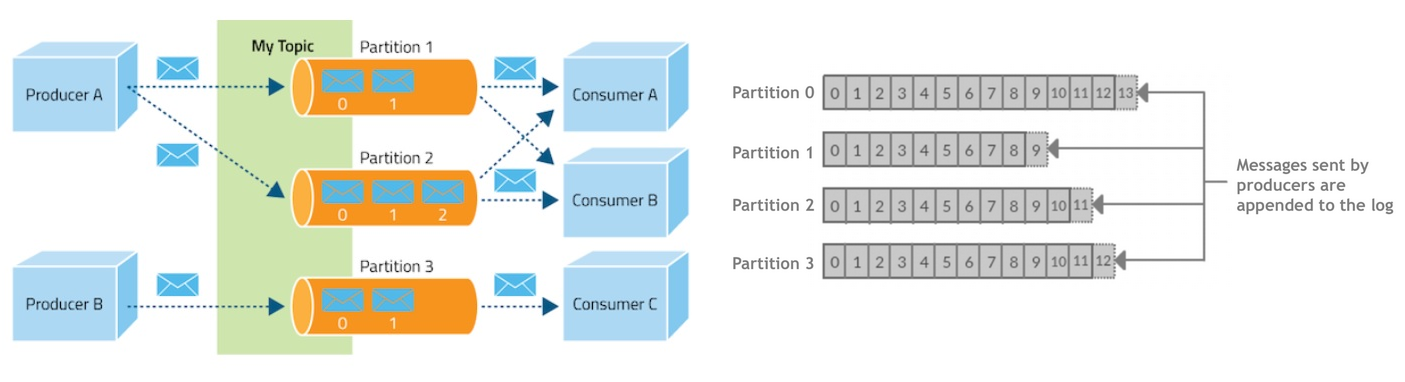

## Core APIs:
- **Admin** API &rarr; Manage and inspect topics, brokers, and other Kafka objects
- **Producer** API &rarr; Publish (write) a stream of events to one or more Kafka topics
- **Consumer** API &rarr; Subscribe to (read) one or more topics and to process the stream of events produced to them
- **Kafka Connect** API &rarr; A framework for integrating Kafka with other systems
 - e.g. A connector to a relational database might capture every change to a set of tables
- **Kafka Stream** API &rarr; Advanced stream processing applications and microservices. Provides higher-level functions to process event streams, (transformations, aggregations, joins, windowing, processing based on event-time. etc)
<hr style="height:2px;width:500px;"> 
- **KsqlDB** &rarr; Real time stream processing in SQL (on top of Stream API)

## Docker Compose file for Kafka-Zookeeper

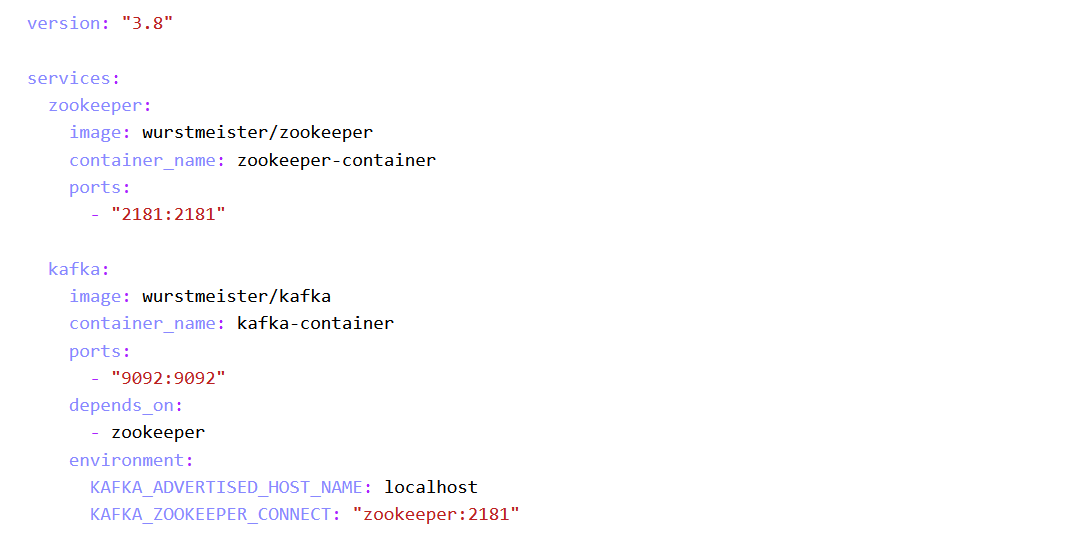

- **Get inside the kafka container**
 - `docker exec -it kafka-container /bin/sh` 
- **Inspect Kafka shell scripts**
 - `cd opt/kafka_2.13-2.8.1/bin`
- **Create a Topic**
 - `kafka-topics.sh --create --zookeeper zookeeper:2181 (OR --bootstrap-server localhost:9092) --partitions 1 --replication-factor 1 --topic messages`
- **List Existing Topics**
 - `kafka-topics.sh --list --zookeeper zookeeper:2181`
- **Describe a Topic**
 - `kafka-topics.sh --describe --zookeeper zookeeper:2181 --topic messages`
- **Delete a Topic**
 - `kafka-topics.sh --delete --zookeeper zookeeper:2181 --topic dummy-topic`

## Create, List, Describe, Delete Topics in a Kafka Container

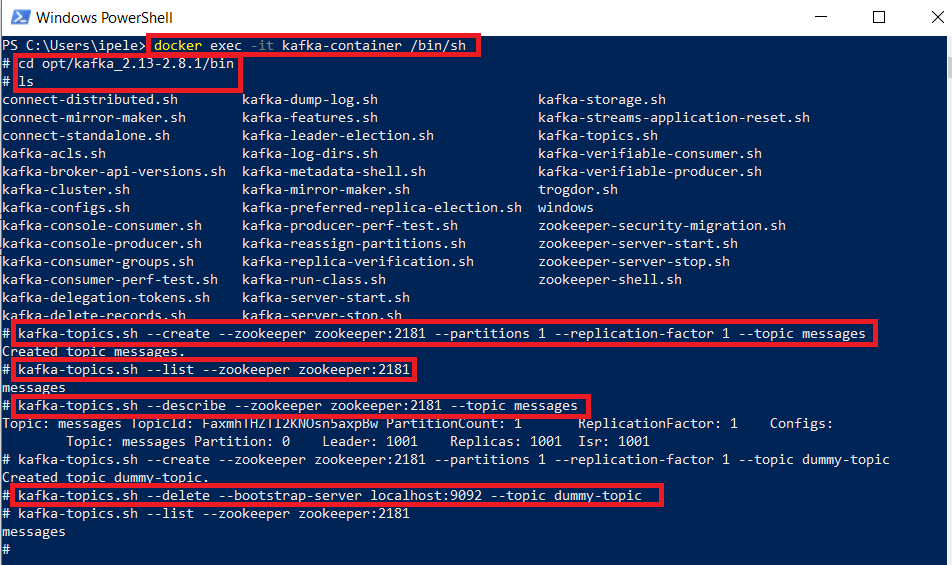

- **Produce messages to a topic**
 - `kafka-console-producer.sh --broker-list kafka:9092 --topic messages`
- **Consume messages from a topic as they come**
 - `kafka-console-consumer.sh --bootstrap-server kafka:9092 --topic messages`
- **Consume from the beginning**
 - `kafka-console-consumer.sh --bootstrap-server kafka:9092 --topic messages --from-beginning`

## Produce and Consume messages with the shell scripts

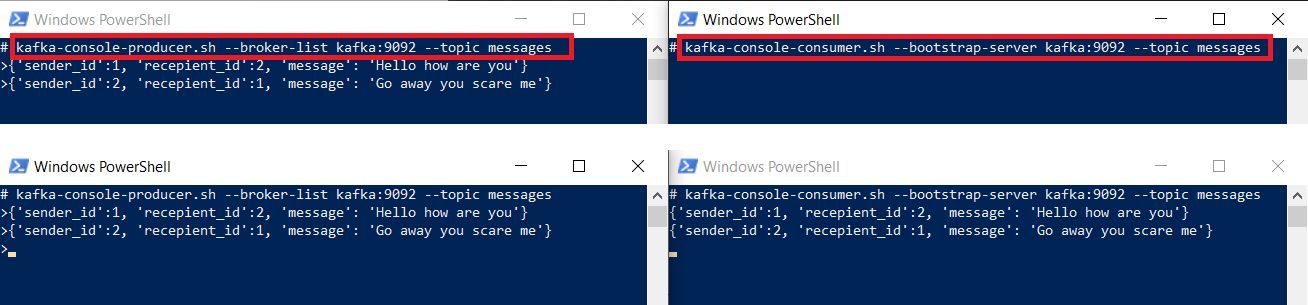

## ([Producer](https://kafka.apache.org/33/javadoc/index.html?org/apache/kafka/clients/producer/KafkaProducer.html)) Send records of sequential numbers to topic as key/value pairs

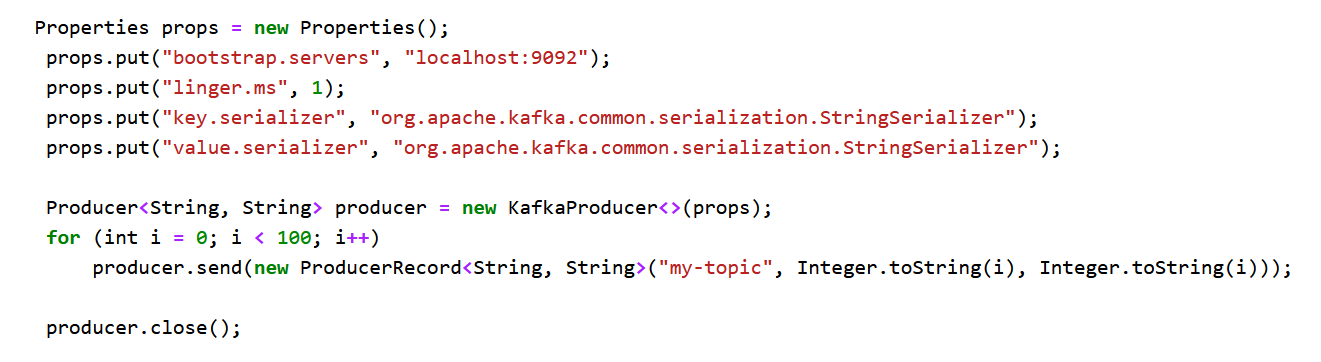

## ([Consumer](https://kafka.apache.org/33/javadoc/index.html?org/apache/kafka/clients/consumer/KafkaConsumer.html)) Subscribe to topics foo and bar as part of a group of consumers 

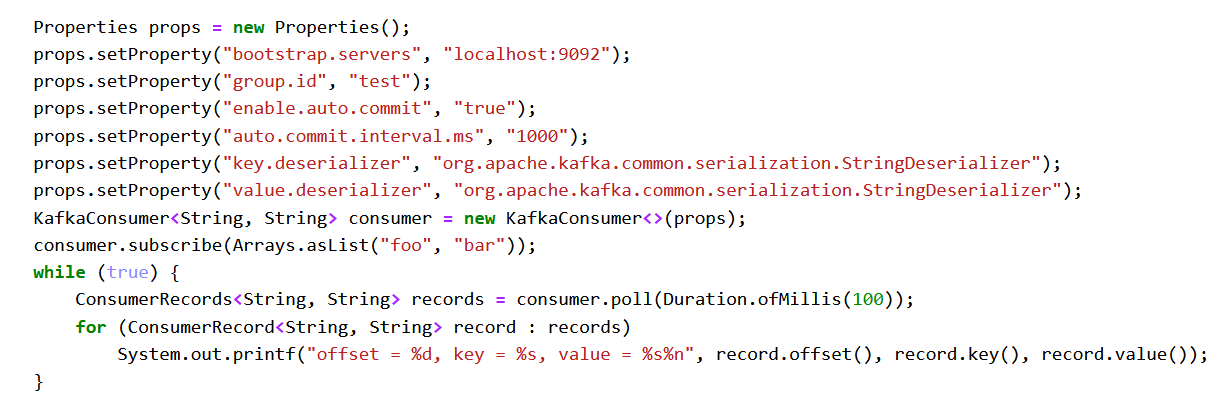

## ([Kafka Streams](https://kafka.apache.org/33/documentation/streams/quickstart)) WordCount algorithm
- Computes word occurrences of text from input topic
- Designed to operate on an infinite, **unbounded** stream of data
- Tracks and updates words counts on output topic
- Periodically outputs results while continuing to process more data

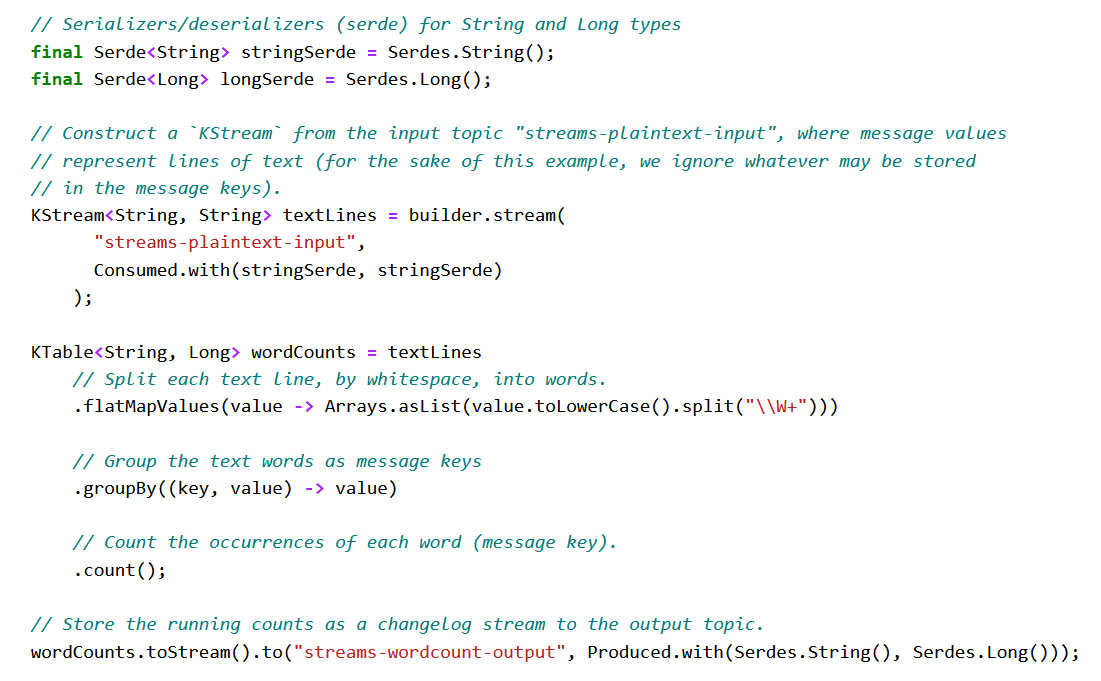

## How it works

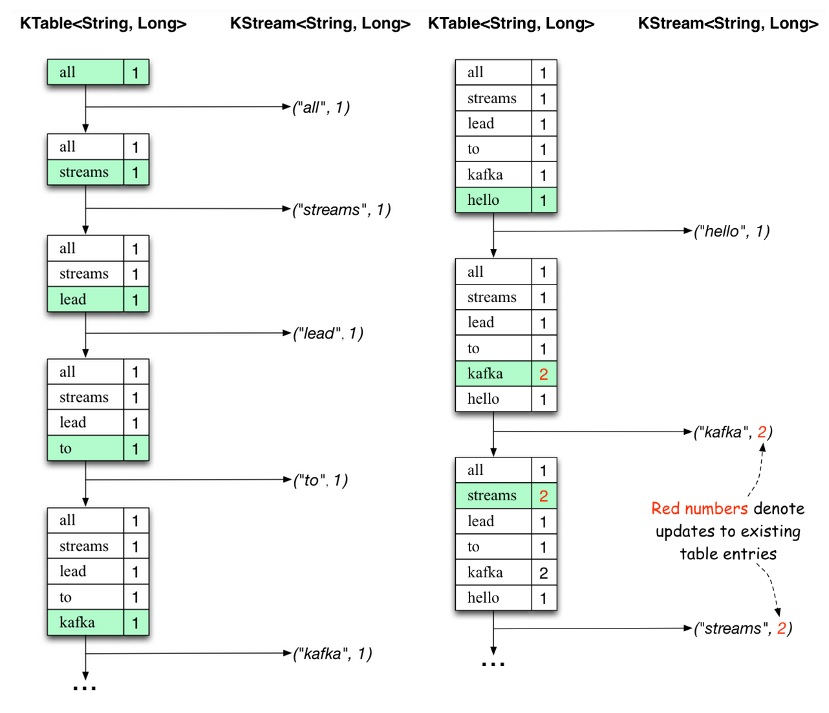

## ([Kafka Connect](https://kafka.apache.org/quickstart#quickstart_kafkaconnect)) Import/Export Data as Event Streams

- Continuously ingest data from external systems into Kafka, and vice versa using **connectors**
- Hundreds of such connectors readily available

### Use Case
- Import data from a file (`test.txt`) to a Kafka topic (`connect-test`)
- Export data from a Kafka topic (`connect-test`) to a file (`test.sink.txt`)

<hr style="width:500px; height:1px">

- Create seed data
 - `echo -e "foo\nbar" > test.txt`
- Start two connectors running in **standalone mode** (run in a single, local, dedicated process) passing their configs
 - A **source** connector that reads lines from an input file and produces each to a Kafka topic
 - A **sink** connector that reads messages from a Kafka topic and produces each as a line in an output file
   - `bin/connect-standalone.sh config/connect-standalone.properties config/connect-file-source.properties config/connect-file-sink.properties`
- Consume `connect-test` topic contents:
 - `> bin/kafka-console-consumer.sh --bootstrap-server localhost:9092 --topic connect-test --from-beginning`
      <br>`{"schema":{"type":"string","optional":false},"payload":"foo"}`
      <br>`{"schema":{"type":"string","optional":false},"payload":"bar"}`
- Verify `test.sink.txt` file output
 - `> more test.sink.txt`
      <br>`foo`
      <br>`bar`
- Add more content to `test.txt` file and verify it appears in consumer output
 - `> echo Another line>> test.txt`

## ([KSQL](https://docs.confluent.io/5.4.2/streams-ksql.html)) Streaming SQL engine for Kafka


Perform stream processing tasks with SQL statements

### Main Components

- KSQL engine – processes KSQL statements and queries
- REST interface – enables client access to the engine
- KSQL CLI – console that provides a command-line interface (CLI) to the engine
- KSQL UI – enables developing KSQL applications in Confluent Control Center

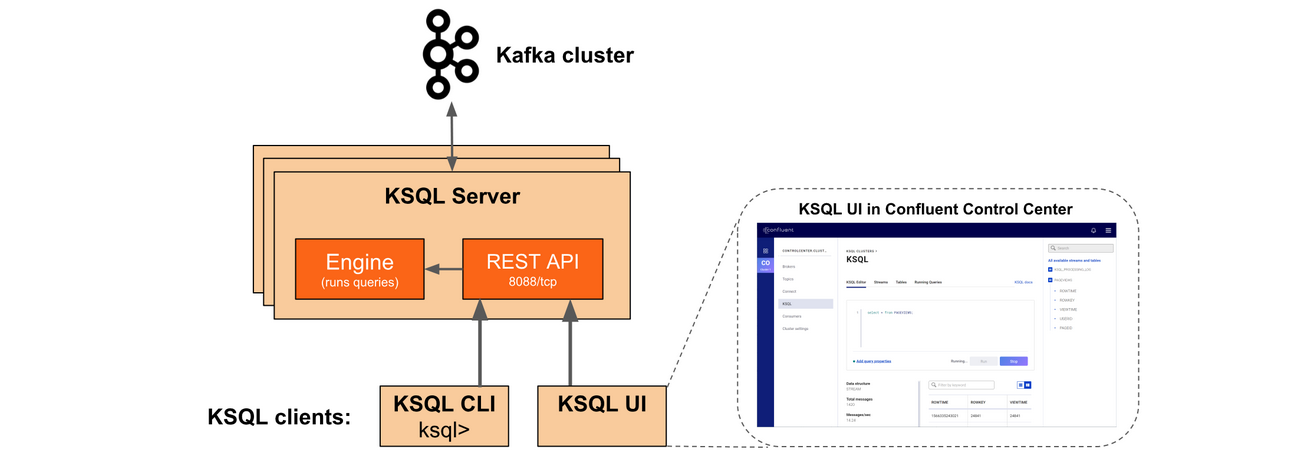

### [Create Streams](https://docs.confluent.io/5.4.2/ksql/docs/tutorials/examples.html)

Create a stream with three columns on the existing Kafka topic `pageviews`

```SQL
CREATE STREAM pageviews
  (viewtime BIGINT,
   userid VARCHAR,
   pageid VARCHAR)
  WITH (KAFKA_TOPIC='pageviews');
```

- Create a table with existing Kafka topic `pageviews`



### [Create Tables](https://docs.confluent.io/5.4.2/ksql/docs/tutorials/examples.html)


```SQL
CREATE TABLE users
  (registertime BIGINT,
   gender VARCHAR,
   regionid VARCHAR,
   userid VARCHAR,
   interests array<VARCHAR>,
   contactinfo map<VARCHAR, VARCHAR>)
  WITH (KAFKA_TOPIC='users',
        VALUE_FORMAT='JSON',
        KEY = 'userid');
```

### [Transform Streams](https://docs.confluent.io/5.4.2/ksql/docs/tutorials/examples.html)

Create a new stream by transforming `pageviews` stream

- The `viewtime` column value is used as the Kafka message timestamp in the new stream’s underlying Kafka topic.
- The new stream’s Kafka topic has `5` partitions.
- The data in the new stream is in `JSON` format.
- Add a new column that shows the message timestamp in human-readable string format.
- The `userid` column is the key for the new stream.


```SQL
CREATE STREAM pageviews_transformed
  WITH (TIMESTAMP='viewtime',
        PARTITIONS=5,
        VALUE_FORMAT='JSON') AS
  SELECT viewtime,
         userid,
         pageid,
         TIMESTAMPTOSTRING(viewtime, 'yyyy-MM-dd HH:mm:ss.SSS') AS timestring
  FROM pageviews
  PARTITION BY userid
  EMIT CHANGES;
```

## References

- Apache Kafka Docs
 - https://kafka.apache.org/documentation.html#ecosystem
- What problems does Kafka solve in distributed systems? - Krzysztof Atłasik
 - https://softwaremill.com/what-problems-does-kafka-solve-in-distributed-systems/
- Apache Kafka - DeveloperExperience
 - https://developerexperience.io/articles/kafka
- Apache Kafka - A primer - The New Stack
 - https://thenewstack.io/apache-kafka-primer/
- Confluent - Apache Kafka 101
 - https://www.youtube.com/playlist?list=PLa7VYi0yPIH0KbnJQcMv5N9iW8HkZHztH
- Apache Kafka with Docker - BetterDataScience
 - https://www.youtube.com/watch?v=4xFZ_iTZLTs&list=PLQ5j-FTc2VhAY_PBg7FVkZsal50MCgp7Y 